## <center>**Підключення бібліотек**</center>

In [2]:
# Імпорт необхідних бібліотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

import skfuzzy as fuzz

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Встановлю стиль графіків
sns.set_theme(style='whitegrid', context='notebook')

---

## <Center> **Завантаження даних та обробка даних** </Center> 

#### **Читання Файлу**

In [5]:
print(os.path.exists("calories.csv"))

True


In [6]:
ds = pd.read_csv("calories.csv")

print("Розмір даних:", ds.shape)

Розмір даних: (15000, 9)


In [7]:
print('columns count - ',len(ds.columns), '\n')
print('columns: ',list(ds.columns))

columns count -  9 

columns:  ['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories']


### **Аналіз даних**

<center><p><b>Пропущені чи відсутні значення</p></center>

In [8]:
print("Чи є будь-які відсутні дані:",ds.isnull().values.any())

Чи є будь-які відсутні дані: False


<center><p><b>Унікальні значення</p></center>

In [9]:
ds.nunique()

User_ID       15000
Gender            2
Age              60
Height           90
Weight           91
Duration         30
Heart_Rate       59
Body_Temp        45
Calories        277
dtype: int64

<center><p><b>Типи даних кожного значення</p></center>

In [10]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


<center><p><b>Масштаб значень ознак</p></center>

In [11]:
ds.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


<mark><b>Унікальних та аномальних даних не знайдено!</mark>

### **Очищення даних**

<center><p><b>Null Data</p></center>

In [12]:
missing = list()
for x in ds.columns:
    if ds[x].isnull().sum() != 0:
        print(ds, ds[x].isnull().sum())
        missing.append(x)
    else:
        print (x + " dont have null data!")

User_ID dont have null data!
Gender dont have null data!
Age dont have null data!
Height dont have null data!
Weight dont have null data!
Duration dont have null data!
Heart_Rate dont have null data!
Body_Temp dont have null data!
Calories dont have null data!


<mark><b>Пропущених даних немає!</mark>

In [13]:
ds.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


<center><p><b>Видалення колонки User_ID</p></center>

In [14]:
# видаляємо стовпець User_ID у зв'язку з тим, що він не несе корисної інформації
ds.drop(columns=["User_ID"], inplace=True)
ds.drop(columns=["Calories"], inplace=True)

<center><p><b>колонка - "Gender"  (One-Hot Encoding)</p></center>

In [15]:
ds = pd.get_dummies(ds, columns=["Gender"], drop_first=True)

In [16]:
ds.head()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Gender_male
0,68,190.0,94.0,29.0,105.0,40.8,True
1,20,166.0,60.0,14.0,94.0,40.3,False
2,69,179.0,79.0,5.0,88.0,38.7,True
3,34,179.0,71.0,13.0,100.0,40.5,False
4,27,154.0,58.0,10.0,81.0,39.8,False


In [17]:
ds["Gender_male"] = ds["Gender_male"].astype(int)

In [18]:
ds.head()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Gender_male
0,68,190.0,94.0,29.0,105.0,40.8,1
1,20,166.0,60.0,14.0,94.0,40.3,0
2,69,179.0,79.0,5.0,88.0,38.7,1
3,34,179.0,71.0,13.0,100.0,40.5,0
4,27,154.0,58.0,10.0,81.0,39.8,0


<center><p><b>Стандартизація</p>

In [19]:
scaler = StandardScaler()
ds_scaled = pd.DataFrame(scaler.fit_transform(ds), columns=ds.columns, index=ds.index)

In [20]:
ds_scaled.describe()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Gender_male
count,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04
mean,3.126388e-17,-5.708027e-16,3.917459e-16,2.711905e-17,-4.429050e-16,-6.546349e-15,6.205407e-17
std,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00
min,-1.342179e+00,-3.609653e+00,-2.591717e+00,-1.746692e+00,-2.975948e+00,-3.754413e+00,-9.929581e-01
25%,-8.710284e-01,-7.340019e-01,-7.959257e-01,-9.052370e-01,-7.845692e-01,-5.460102e-01,-9.929581e-01
50%,-2.231960e-01,3.751439e-02,-6.430706e-02,5.642555e-02,5.024170e-02,2.240064e-01,-9.929581e-01
75%,7.779997e-01,7.388928e-01,8.003331e-01,8.978803e-01,7.807012e-01,7.373508e-01,1.007092e+00
max,2.132559e+00,3.333993e+00,3.793318e+00,1.739335e+00,3.389485e+00,1.892376e+00,1.007092e+00


## <Center> **Кластеризація у вихідному просторі (без зменшення розмірності)** </Center> 

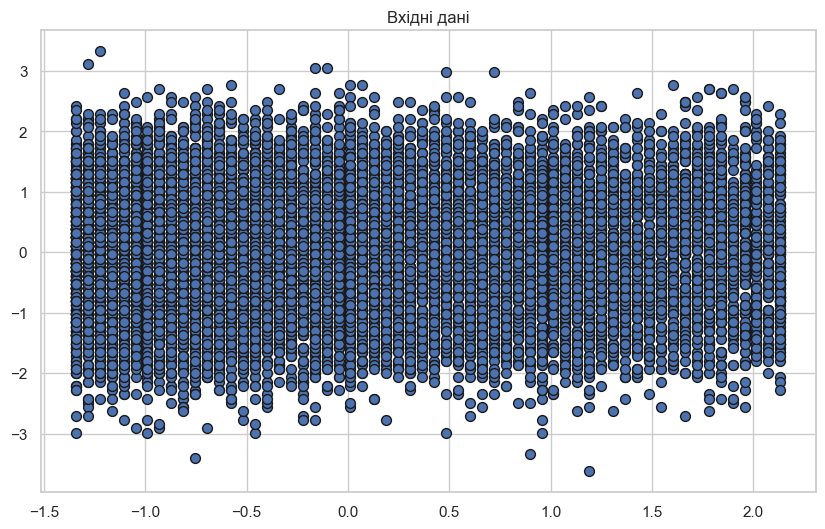

In [21]:
# Перевіряємо тип даних і конвертуємо, якщо потрібно
if isinstance(ds_scaled, pd.DataFrame):
    X_scaled = ds_scaled.values
else:
    X_scaled = ds_scaled

# Візуалізуємо вхідні дані (перші два виміри, якщо їх більше)
plt.figure(figsize=(10, 6))
if X_scaled.shape[1] >= 2:
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], s=50, marker='o', edgecolor='k')
    plt.title('Вхідні дані')
    plt.grid(True)
    plt.show()
else:
    print("Дані мають менше двох вимірів, неможливо візуалізувати як звичайну скатерограму")

#### <center> <p style = 'background-color:darkblue'><b>K-means</p> </center>

In [22]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import pandas as pd
import matplotlib.pyplot as plt

# Побудова KMeans-моделі з 3 кластерами
kmeans_original = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_original = kmeans_original.fit_predict(ds_scaled)
centroids_original = kmeans_original.cluster_centers_

sil_score_kmeans = silhouette_score(ds_scaled, labels_original)
db_score_kmeans = davies_bouldin_score(ds_scaled, labels_original)
ch_score_kmeans = calinski_harabasz_score(ds_scaled, labels_original)

# Виведення результатів
print(f"Silhouette Score: {sil_score_kmeans:.3f}")
print(f"Davies-Bouldin Index: {db_score_kmeans:.3f}")
print(f"Calinski-Harabasz Index: {ch_score_kmeans:.3f}")



  File "C:\Users\gnatu\AppData\Roaming\Python\Python313\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Program Files\Python313\Lib\subprocess.py", line 556, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Program Files\Python313\Lib\subprocess.py", line 1038, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Program Files\

Silhouette Score: 0.290
Davies-Bouldin Index: 1.164
Calinski-Harabasz Index: 6923.905


#### <center> <p style = 'background-color:darkblue'><b>Fuzzy C-Means</p> </center>

In [23]:
n_clusters = 3

# Визначаємо параметри FCM
m = 2  # Параметр нечіткості (зазвичай = 2)
error = 0.005  # Поріг збіжності
maxiter = 100  # Максимальна кількість ітерацій

X_transposed = X_scaled.T

# Виконуємо нечітку кластеризацію
cntr, u, u0, d, jm, p, fpc_fuzzy = fuzz.cmeans(
    X_transposed, n_clusters, m, error=error, maxiter=maxiter, init=None)

# Отримання матриці приналежності
fuzzy_membership_matrix = u.T  # Транспонуємо назад для отримання матриці приналежності

# Виведемо перші 5 рядків матриці приналежності
print("Матриця приналежності (перші 5 об'єктів):")
print(pd.DataFrame(fuzzy_membership_matrix[:5], columns=[f'Кластер {i+1}' for i in range(n_clusters)]))

# Перетворення нечітких результатів на "жорстке" розбиття
cluster_labels = np.argmax(fuzzy_membership_matrix, axis=1)

# Підрахуємо кількість елементів у кожному кластері
unique_labels, counts = np.unique(cluster_labels, return_counts=True)
print("\nРозподіл об'єктів за кластерами:")
for i, count in zip(unique_labels, counts): 
    print(f"Кластер {i+1}: {count} об'єктів")

# Обчислення Silhouette Score для "жорсткого" розбиття
silhouette_avg_fuzzy = silhouette_score(X_scaled, cluster_labels)
print(f"\nSilhouette Score: {silhouette_avg_fuzzy:.4f}")

# Обчислення Fuzzy Partition Coefficient (FPC) - (Чим ближче до 1, тим краще розбиття)
print(f"\nFuzzy Partition Coefficient: {fpc_fuzzy:.4f}")

# Обчислення Xie-Beni індексу
def xie_beni_index(X, cntr, u, m):
    n_samples = X.shape[0]
    n_clusters = cntr.shape[0]
    
    # Обчислення компактності
    numerator = 0
    for i in range(n_clusters):
        for k in range(n_samples):
            numerator += u[k, i]**m * np.sum((X[k] - cntr[i])**2)
    
    # Обчислення розділення
    min_cntr_dist = float('inf')
    for i in range(n_clusters):
        for j in range(i+1, n_clusters):
            dist = np.sum((cntr[i] - cntr[j])**2)
            if dist < min_cntr_dist:
                min_cntr_dist = dist
    
    # Xie-Beni індекс
    if min_cntr_dist > 0:
        xb = numerator / (n_samples * min_cntr_dist)
    else:
        xb = float('inf')  # якщо центри співпадають
    return xb

# Обчислюємо Xie-Beni індекс
xb_index_fuzzy = xie_beni_index(X_scaled, cntr, fuzzy_membership_matrix, m)
print(f"Xie-Beni індекс: {xb_index_fuzzy:.4f}")
print("(Чим менше значення, тим краще розбиття)")

Матриця приналежності (перші 5 об'єктів):
   Кластер 1  Кластер 2  Кластер 3
0   0.148997   0.231084   0.619919
1   0.283483   0.566081   0.150436
2   0.556460   0.168316   0.275224
3   0.217978   0.558955   0.223067
4   0.545928   0.312770   0.141302

Розподіл об'єктів за кластерами:
Кластер 1: 4560 об'єктів
Кластер 2: 4847 об'єктів
Кластер 3: 5593 об'єктів

Silhouette Score: 0.2861

Fuzzy Partition Coefficient: 0.4918
Xie-Beni індекс: 0.3038
(Чим менше значення, тим краще розбиття)


In [24]:
# # Експеримент з різною кількістю кластерів (опційно)
# def evaluate_cluster_count(X, max_clusters=10):
#     results = []
#     for n_clust in range(2, max_clusters+1):
#         # Виконуємо FCM
#         cntr, u, _, d, _, _, fpc = fuzz.cmeans(
#             X.T, n_clust, m=2, error=0.005, maxiter=100)
        
#         # Отримуємо жорстке розбиття
#         u_hard = np.argmax(u.T, axis=1)
        
#         # Обчислюємо метрики
#         if len(np.unique(u_hard)) > 1:  # перевіряємо, що є хоча б 2 різні кластери
#             silhouette = silhouette_score(X, u_hard)
#         else:
#             silhouette = -1  # якщо всі об'єкти в одному кластері
        
#         xb = xie_beni_index(X, cntr, u.T, 2)
        
#         results.append({
#             'n_clusters': n_clust,
#             'fpc': fpc,
#             'silhouette': silhouette,
#             'xie_beni': xb
#         })
    
#     return pd.DataFrame(results)

# evaluate_cluster_count(X_scaled)

In [25]:
# # Візуалізація результатів кластеризації (якщо даних більше 1D)
# if X_scaled.shape[1] >= 2:
#     # Обмежуємо кількість елементів для візуалізації до 500
#     max_points = 15000
#     if X_scaled.shape[0] > max_points:
#         # Створюємо випадкову вибірку індексів для візуалізації
#         viz_indices = np.random.choice(X_scaled.shape[0], max_points, replace=False)
#         X_viz = X_scaled[viz_indices]
#         labels_viz = cluster_labels[viz_indices]
#         membership_viz = fuzzy_membership_matrix[viz_indices]
#     else:
#         X_viz = X_scaled
#         labels_viz = cluster_labels
#         membership_viz = fuzzy_membership_matrix
    
#     plt.figure(figsize=(15, 6))
    
#     # Візуалізація "жорсткого" розбиття (для перших двох вимірів)
#     plt.subplot(1, 2, 1)
#     colors = ['red', 'blue', 'green', 'purple', 'orange', 'cyan']
#     for i in range(n_clusters):
#         plt.scatter(X_viz[labels_viz == i, 0], X_viz[labels_viz == i, 1], 
#                     s=50, c=colors[i % len(colors)], label=f'Кластер {i+1}', alpha=0.7)
#     plt.scatter(cntr[:, 0], cntr[:, 1], s=200, c='black', marker='*', label='Центри')
#     plt.title(f'"Жорстке" розбиття (Silhouette Score: {silhouette_avg:.4f})\n(обмежено до {len(X_viz)} точок)')
#     plt.grid(True)
#     plt.legend()
    
#     # Візуалізація нечіткої приналежності для першого кластера
#     plt.subplot(1, 2, 2)
#     scatter = plt.scatter(X_viz[:, 0], X_viz[:, 1], c=membership_viz[:, 0], 
#                 s=50, cmap='viridis', vmin=0, vmax=1)
#     plt.colorbar(scatter, label=f'Приналежність до кластера 1')
#     plt.title(f'Нечітка приналежність до кластера 1\n(обмежено до {len(X_viz)} точок)')
#     plt.grid(True)
#     plt.show()
    
#     # Додаткові графіки для інших кластерів
#     for i in range(1, n_clusters):
#         plt.figure(figsize=(8, 6))
#         scatter = plt.scatter(X_viz[:, 0], X_viz[:, 1], c=membership_viz[:, i], 
#                     s=50, cmap='viridis', vmin=0, vmax=1)
#         plt.colorbar(scatter, label=f'Приналежність до кластера {i+1}')
#         plt.title(f'Нечітка приналежність до кластера {i+1}\n(обмежено до {len(X_viz)} точок)')
#         plt.grid(True)
#         plt.show()

#### <center> <p style = 'background-color:darkblue'><b>GMM</p> </center>

In [26]:
from sklearn.mixture import GaussianMixture

# Створюємо модель GMM з 3 кластерами
gmm_original = GaussianMixture(n_components=4, random_state=42)

# Навчаємо модель на твоїх оброблених даних
gmm_original.fit(X_scaled)

labels_gmm_original = gmm_original.predict(ds_scaled)
# Отримуємо м’які ймовірнісні призначення для кожного об’єкта
probs = gmm_original.predict_proba(X_scaled)

# Виведемо приклад ймовірностей для перших 5 об'єктів
import pandas as pd
pd.DataFrame(probs[:5])

,0,1,2,3
0,3.466529e-36,1.000000e+00,0.000000,0.000000
1,0.000000e+00,0.000000e+00,0.983529,0.016471
2,9.999990e-01,9.618495e-07,0.000000,0.000000
3,0.000000e+00,0.000000e+00,0.524434,0.475566
4,0.000000e+00,0.000000e+00,0.502213,0.497787


In [27]:
from sklearn.metrics import silhouette_score
import numpy as np

# Перетворюємо м’які призначення на жорсткі (присвоюємо кластер з найбільшою ймовірністю)
labels = np.argmax(probs, axis=1)

# Обчислюємо silhouette score для жорсткого розбиття
sil_score_gmm = silhouette_score(ds_scaled, labels)
print(f'Silhouette Score: {sil_score_gmm:.4f}')

# Додатково: Порівняння моделей з різною кількістю кластерів за AIC та BIC
aic = []
bic = []
n_components_range = range(1, 10)

for n in n_components_range:
    gmm_model = GaussianMixture(n_components=n, random_state=42)
    gmm_model.fit(ds_scaled)
    aic.append(gmm_model.aic(ds_scaled))
    bic.append(gmm_model.bic(ds_scaled))


Silhouette Score: 0.2725


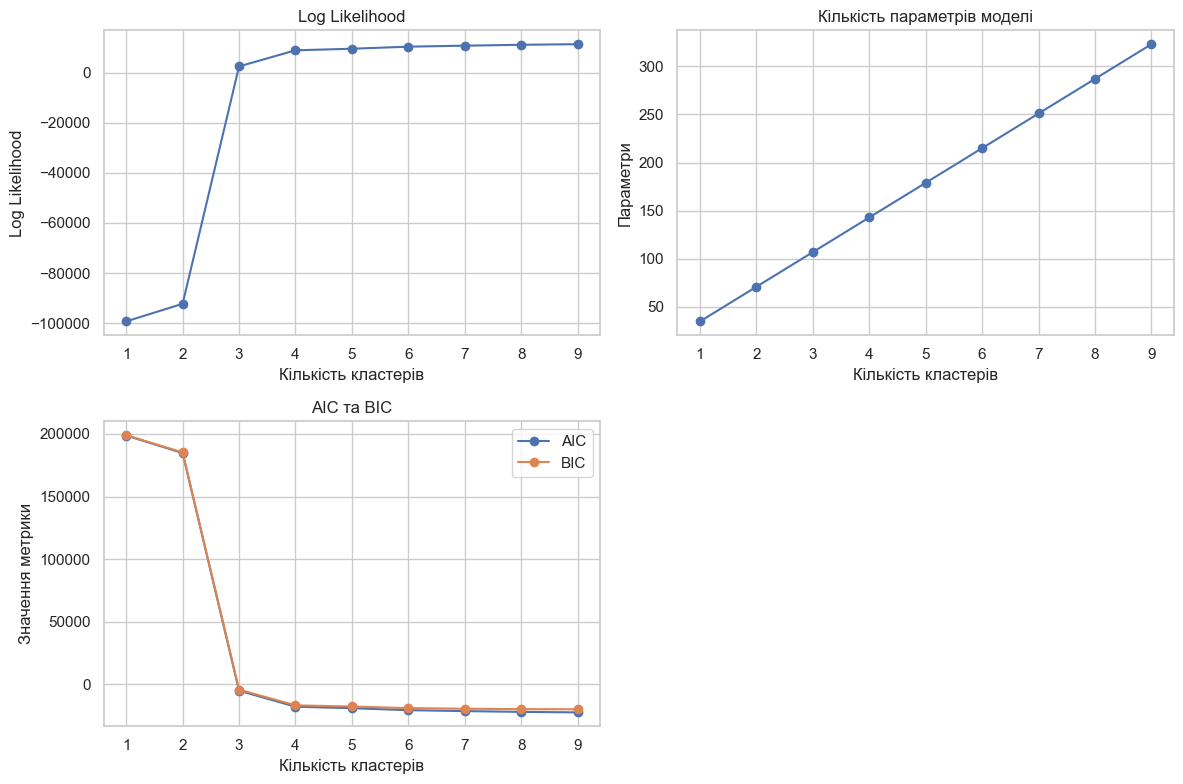

In [28]:
n_components_range = range(1, 10)
# Створимо списки для збереження результатів
log_likelihoods = []
n_parameters = []
aic = []
bic = []

# Проганяємо GMM для різної кількості кластерів
for n in n_components_range:
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(ds_scaled)
    log_likelihoods.append(gmm.score(ds_scaled) * len(ds_scaled))
    n_parameters.append(gmm._n_parameters())
    aic.append(gmm.aic(ds_scaled))
    bic.append(gmm.bic(ds_scaled))

# Побудова графіків для візуалізації
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(n_components_range, log_likelihoods, marker='o')
plt.title('Log Likelihood')
plt.xlabel('Кількість кластерів')
plt.ylabel('Log Likelihood')

plt.subplot(2, 2, 2)
plt.plot(n_components_range, n_parameters, marker='o')
plt.title('Кількість параметрів моделі')
plt.xlabel('Кількість кластерів')
plt.ylabel('Параметри')

plt.subplot(2, 2, 3)
plt.plot(n_components_range, aic, marker='o', label='AIC')
plt.plot(n_components_range, bic, marker='o', label='BIC')
plt.title('AIC та BIC')
plt.xlabel('Кількість кластерів')
plt.ylabel('Значення метрики')
plt.legend()

plt.tight_layout()
plt.show()


#### <center> <p style = 'background-color:darkblue'><b>DBSCAN</p> </center>

In [29]:
# Вибираємо випадкові 1500 рядків з усіх даних
ds_samples_dbscan = ds.sample(n=1500, random_state=42)

# Масштабуємо дані заново
ds_scaled_sampled_dbscan = scaler.fit_transform(ds_samples_dbscan)

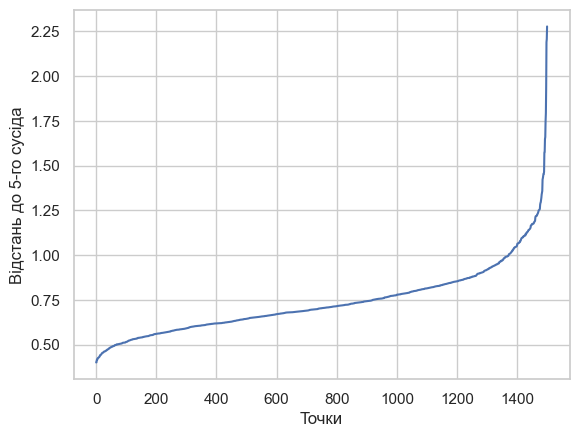

In [30]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(ds_scaled_sampled_dbscan)
distances, indices = nbrs.kneighbors(ds_scaled_sampled_dbscan)

# Сортуємо відстані
distances = np.sort(distances[:, 4])
plt.plot(distances)
plt.xlabel('Точки')
plt.ylabel('Відстань до 5-го сусіда')
plt.grid(True)
plt.show()

In [31]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

best_score_dbscan = -1
best_eps_dbscan = None
best_min_samples_dbscan = None

eps_values_dbscan = np.arange(0.5, 2.5, 0.1)
min_samples_values_dbscan = range(10, 17)

for eps in eps_values_dbscan:
    for min_s in min_samples_values_dbscan:
        db = DBSCAN(eps=eps, min_samples=min_s)
        labels = db.fit_predict(ds_scaled_sampled_dbscan)
        
        unique_labels = set(labels)
        
        if len(unique_labels - {-1}) >= 2:
            score = silhouette_score(ds_scaled_sampled_dbscan[labels != -1], labels[labels != -1])
            
            if score > best_score_dbscan:
                best_score_dbscan = score
                best_eps_dbscan = eps
                best_min_samples_dbscan = min_s

print(f'Найкращі параметри:')
print(f'eps = {best_eps_dbscan}')
print(f'min_samples = {best_min_samples_dbscan}')
print(f'Silhouette Score = {best_score_dbscan:.4f}')


Найкращі параметри:
eps = 0.6
min_samples = 13
Silhouette Score = 0.8276


In [32]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=best_eps_dbscan, min_samples=best_min_samples_dbscan)
labels = dbscan.fit_predict(ds_scaled_sampled_dbscan)                                              

In [33]:
from sklearn.metrics import silhouette_score

# Маска для точок, які не є шумом
mask = labels != -1
sil_score_wo_noise = silhouette_score(ds_scaled_sampled_dbscan[mask], labels[mask])
print(f'Silhouette Score без шуму: {sil_score_wo_noise:.4f}')

Silhouette Score без шуму: 0.8276


In [34]:
sil_score_with_noise = silhouette_score(ds_scaled_sampled_dbscan, labels)
print(f'Silhouette Score зі шумом: {sil_score_with_noise:.4f}')

Silhouette Score зі шумом: -0.2780


## <Center> **Зменшення розмірності за допомогою PCA (до 2-3 компонент)** </Center> 

#### <center> <p style = 'background-color:darkblue'><b>Застосування PCA</p> </center>

In [35]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
ds_pca = pca.fit_transform(ds_scaled)

print(f'Відсоток поясненої варіації: {pca.explained_variance_ratio_}')
print(f'Сумарно пояснюють: {pca.explained_variance_ratio_.sum() * 100:.2f}%')

Відсоток поясненої варіації: [0.38402747 0.37714649]
Сумарно пояснюють: 76.12%


#### <center> <p style = 'background-color:darkblue'><b>Повторна кластеризація</p> </center>

In [36]:
# Побудова KMeans-моделі з 3 кластерами
kmeans_pca = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_pca = kmeans_pca.fit_predict(ds_pca)
centroids_pca = kmeans_pca.cluster_centers_

sil_score_kmeans_pca = silhouette_score(ds_pca, labels_pca)
db_score_kmeans_pca = davies_bouldin_score(ds_pca, labels_pca)
ch_score_kmeans_pca = calinski_harabasz_score(ds_pca, labels_pca)

print("Метрики до PCA")
print(f"Silhouette Score: {sil_score_kmeans:.3f}")
print(f"Davies-Bouldin Index: {db_score_kmeans:.3f}")
print(f"Calinski-Harabasz Index: {ch_score_kmeans:.3f}")

# Виведення результатів
print("\nМетрики після PCA")
print(f"Silhouette Score: {sil_score_kmeans_pca:.3f}")
print(f"Davies-Bouldin Index: {db_score_kmeans_pca:.3f}")
print(f"Calinski-Harabasz Index: {ch_score_kmeans_pca:.3f}")

Метрики до PCA
Silhouette Score: 0.290
Davies-Bouldin Index: 1.164
Calinski-Harabasz Index: 6923.905

Метрики після PCA
Silhouette Score: 0.408
Davies-Bouldin Index: 0.841
Calinski-Harabasz Index: 12564.163


In [37]:
n_clusters = 3

# Визначаємо параметри FCM
m = 2  # Параметр нечіткості (зазвичай = 2)
error = 0.005  # Поріг збіжності
maxiter = 100  # Максимальна кількість ітерацій

ds_pca_transposed = ds_pca.T

# Виконуємо нечітку кластеризацію
cntr, u, u0, d, jm, p, fpc_fuzzy_pca = fuzz.cmeans(
    ds_pca_transposed, n_clusters, m, error=error, maxiter=maxiter, init=None)

# Отримання матриці приналежності
fuzzy_membership_matrix = u.T  # Транспонуємо назад для отримання матриці приналежності

# Перетворення нечітких результатів на "жорстке" розбиття
cluster_labels = np.argmax(fuzzy_membership_matrix, axis=1)

# Обчислення Silhouette Score для "жорсткого" розбиття
silhouette_avg_fuzzy_pca = silhouette_score(ds_pca, cluster_labels)
print(f"\nSilhouette Score: {silhouette_avg_fuzzy_pca:.4f}")

# Обчислення Fuzzy Partition Coefficient (FPC) - (Чим ближче до 1, тим краще розбиття)
print(f"\nFuzzy Partition Coefficient: {fpc_fuzzy_pca:.4f}")

# Обчислення Xie-Beni індексу
def xie_beni_index(X, cntr, u, m):
    n_samples = X.shape[0]
    n_clusters = cntr.shape[0]
    
    # Обчислення компактності
    numerator = 0
    for i in range(n_clusters):
        for k in range(n_samples):
            numerator += u[k, i]**m * np.sum((X[k] - cntr[i])**2)
    
    # Обчислення розділення
    min_cntr_dist = float('inf')
    for i in range(n_clusters):
        for j in range(i+1, n_clusters):
            dist = np.sum((cntr[i] - cntr[j])**2)
            if dist < min_cntr_dist:
                min_cntr_dist = dist
    
    # Xie-Beni індекс
    if min_cntr_dist > 0:
        xb = numerator / (n_samples * min_cntr_dist)
    else:
        xb = float('inf')  # якщо центри співпадають
    return xb

# Обчислюємо Xie-Beni індекс
xb_index_fuzzy_pca = xie_beni_index(ds_pca, cntr, fuzzy_membership_matrix, m)
print(f"Xie-Beni індекс: {xb_index_fuzzy_pca:.4f}")
print("(Чим менше значення, тим краще розбиття)\n")

print("Метрики до PCA")
print(f"Silhouette Score: {silhouette_avg_fuzzy:.4f}")
print(f"Fuzzy Partition Coefficient: {fpc_fuzzy:.4f}")
print(f"Xie-Beni індекс: {xb_index_fuzzy:.4f}")



Silhouette Score: 0.4049

Fuzzy Partition Coefficient: 0.6331
Xie-Beni індекс: 0.1457
(Чим менше значення, тим краще розбиття)

Метрики до PCA
Silhouette Score: 0.2861
Fuzzy Partition Coefficient: 0.4918
Xie-Beni індекс: 0.3038


In [38]:
# Створюємо модель GMM з 3 кластерами
gmm_pca = GaussianMixture(n_components=4, random_state=42)
# Навчаємо модель на твоїх оброблених даних
gmm_pca.fit(ds_pca)
# Отримуємо м’які ймовірнісні призначення для кожного об’єкта
probs = gmm_pca.predict_proba(ds_pca)
labels_gmm_pca = gmm_pca.predict(ds_pca)

labels = np.argmax(probs, axis=1)

# Обчислюємо silhouette score для жорсткого розбиття
sil_score_gmm_pca = silhouette_score(ds_pca, labels)

print("Дані до PCA")
print(f'Silhouette Score: {sil_score_gmm:.4f}')
print("\nДані після PCA")
print(f'Silhouette Score: {sil_score_gmm_pca:.4f}')


Дані до PCA
Silhouette Score: 0.2725

Дані після PCA
Silhouette Score: 0.4277


In [39]:
pca_dbscan = PCA(n_components=2)
ds_pca_dbscan = pca_dbscan.fit_transform(ds_scaled_sampled_dbscan)

print(f'Відсоток поясненої варіації: {pca_dbscan.explained_variance_ratio_}')
print(f'Сумарно пояснюють: {pca_dbscan.explained_variance_ratio_.sum() * 100:.2f}%')

Відсоток поясненої варіації: [0.38626543 0.37461373]
Сумарно пояснюють: 76.09%


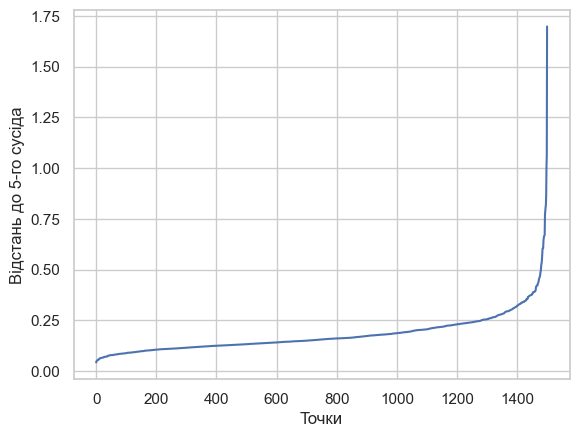

In [40]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(ds_pca_dbscan)
distances, indices = nbrs.kneighbors(ds_pca_dbscan)

# Сортуємо відстані
distances = np.sort(distances[:, 4])
plt.plot(distances)
plt.xlabel('Точки')
plt.ylabel('Відстань до 5-го сусіда')
plt.grid(True)
plt.show()

In [41]:
best_score_dbscan_pca = -1
best_eps_dbscan_pca = None
best_min_samples_dbscan_pca = None

eps_values_dbscan_pca = np.arange(0.1, 0.5, 0.1)
min_samples_values_dbscan_pca = range(10, 17)

for eps in eps_values_dbscan_pca:
    for min_s in min_samples_values_dbscan_pca:
        db = DBSCAN(eps=eps, min_samples=min_s)
        labels = db.fit_predict(ds_pca_dbscan)
        
        unique_labels = set(labels)
        
        if len(unique_labels - {-1}) >= 2:
            score = silhouette_score(ds_pca_dbscan[labels != -1], labels[labels != -1])
            
            if score > best_score_dbscan_pca:
                best_score_dbscan_pca = score
                best_eps_dbscan_pca = eps
                best_min_samples_dbscan_pca = min_s

print(f'Найкращі параметри without PCA:')
print(f'eps = {best_eps_dbscan}')
print(f'min_samples = {best_min_samples_dbscan}')
print(f'Silhouette Score = {best_score_dbscan:.4f}')
print(f'Найкращі параметриwith PCA:')
print(f'eps = {best_eps_dbscan_pca}')
print(f'min_samples = {best_min_samples_dbscan_pca}')
print(f'Silhouette Score = {best_score_dbscan_pca:.4f}')


Найкращі параметри without PCA:
eps = 0.6
min_samples = 13
Silhouette Score = 0.8276
Найкращі параметриwith PCA:
eps = 0.1
min_samples = 10
Silhouette Score = 0.9743


## <Center> **Зменшення розмірності за допомогою PCA (до 4-5 компонент)** </Center> 

#### <center> <p style = 'background-color:darkblue'><b>Застосування PCA 4</p> </center>

In [42]:
from sklearn.decomposition import PCA

pca_t2 = PCA(n_components=4)
ds_pca_t2 = pca_t2.fit_transform(ds_scaled)

print(f'Відсоток поясненої варіації: {pca.explained_variance_ratio_}')
print(f'Сумарно пояснюють: {pca_t2.explained_variance_ratio_.sum() * 100:.2f}%')

Відсоток поясненої варіації: [0.38402747 0.37714649]
Сумарно пояснюють: 95.08%


#### <center> <p style = 'background-color:darkblue'><b>Повторна кластеризація</p> </center>

In [43]:
# Побудова KMeans-моделі з 3 кластерами
kmeans_pca_t2 = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_pca_t2 = kmeans_pca_t2.fit_predict(ds_pca_t2)
centroids_pca_t2 = kmeans_pca_t2.cluster_centers_

sil_score_kmeans_pca_t2 = silhouette_score(ds_pca_t2, labels_pca_t2)
db_score_kmeans_pca_t2 = davies_bouldin_score(ds_pca_t2, labels_pca_t2)
ch_score_kmeans_pca_t2 = calinski_harabasz_score(ds_pca_t2, labels_pca_t2)

print("Метрики до PCA")
print(f"Silhouette Score: {sil_score_kmeans:.3f}")
print(f"Davies-Bouldin Index: {db_score_kmeans:.3f}")
print(f"Calinski-Harabasz Index: {ch_score_kmeans:.3f}")

# Виведення результатів
print("\nМетрики після PCA 2")
print(f"Silhouette Score: {sil_score_kmeans_pca:.3f}")
print(f"Davies-Bouldin Index: {db_score_kmeans_pca:.3f}")
print(f"Calinski-Harabasz Index: {ch_score_kmeans_pca:.3f}")

# Виведення результатів
print("\nМетрики після PCA 4")
print(f"Silhouette Score: {sil_score_kmeans_pca_t2:.3f}")
print(f"Davies-Bouldin Index: {db_score_kmeans_pca_t2:.3f}")
print(f"Calinski-Harabasz Index: {ch_score_kmeans_pca_t2:.3f}")

Метрики до PCA
Silhouette Score: 0.290
Davies-Bouldin Index: 1.164
Calinski-Harabasz Index: 6923.905

Метрики після PCA 2
Silhouette Score: 0.408
Davies-Bouldin Index: 0.841
Calinski-Harabasz Index: 12564.163

Метрики після PCA 4
Silhouette Score: 0.311
Davies-Bouldin Index: 1.104
Calinski-Harabasz Index: 7631.964


In [44]:
n_clusters = 3

# Визначаємо параметри FCM
m = 2  # Параметр нечіткості (зазвичай = 2)
error = 0.005  # Поріг збіжності
maxiter = 100  # Максимальна кількість ітерацій

ds_pca_transposed = ds_pca_t2.T

# Виконуємо нечітку кластеризацію
cntr, u, u0, d, jm, p, fpc_fuzzy_pca_t2 = fuzz.cmeans(
    ds_pca_transposed, n_clusters, m, error=error, maxiter=maxiter, init=None)

# Отримання матриці приналежності
fuzzy_membership_matrix = u.T  # Транспонуємо назад для отримання матриці приналежності

# Перетворення нечітких результатів на "жорстке" розбиття
cluster_labels = np.argmax(fuzzy_membership_matrix, axis=1)

# Обчислення Silhouette Score для "жорсткого" розбиття
silhouette_avg_fuzzy_pca_t2 = silhouette_score(ds_pca_t2, cluster_labels)

# Обчислення Xie-Beni індексу
def xie_beni_index(X, cntr, u, m):
    n_samples = X.shape[0]
    n_clusters = cntr.shape[0]
    
    # Обчислення компактності
    numerator = 0
    for i in range(n_clusters):
        for k in range(n_samples):
            numerator += u[k, i]**m * np.sum((X[k] - cntr[i])**2)
    
    # Обчислення розділення
    min_cntr_dist = float('inf')
    for i in range(n_clusters):
        for j in range(i+1, n_clusters):
            dist = np.sum((cntr[i] - cntr[j])**2)
            if dist < min_cntr_dist:
                min_cntr_dist = dist
    
    # Xie-Beni індекс
    if min_cntr_dist > 0:
        xb = numerator / (n_samples * min_cntr_dist)
    else:
        xb = float('inf')  # якщо центри співпадають
    return xb

# Обчислюємо Xie-Beni індекс
xb_index_fuzzy_pca_t2 = xie_beni_index(ds_pca_t2, cntr, fuzzy_membership_matrix, m)

print("Метрики до PCA")
print(f"Silhouette Score: {silhouette_avg_fuzzy:.4f}")
print(f"Fuzzy Partition Coefficient: {fpc_fuzzy:.4f}")
print(f"Xie-Beni індекс: {xb_index_fuzzy:.4f}")

print("Метрики після PCA - 2")
print(f"Silhouette Score: {silhouette_avg_fuzzy_pca:.4f}")
print(f"Fuzzy Partition Coefficient: {fpc_fuzzy_pca:.4f}")
print(f"Xie-Beni індекс: {xb_index_fuzzy_pca:.4f}")

print("Метрики після PCA - 4")
print(f"Silhouette Score: {silhouette_avg_fuzzy_pca_t2:.4f}")
print(f"Fuzzy Partition Coefficient: {fpc_fuzzy_pca_t2:.4f}")
print(f"Xie-Beni індекс: {xb_index_fuzzy_pca_t2:.4f}")

Метрики до PCA
Silhouette Score: 0.2861
Fuzzy Partition Coefficient: 0.4918
Xie-Beni індекс: 0.3038
Метрики після PCA - 2
Silhouette Score: 0.4049
Fuzzy Partition Coefficient: 0.6331
Xie-Beni індекс: 0.1457
Метрики після PCA - 4
Silhouette Score: 0.3072
Fuzzy Partition Coefficient: 0.5188
Xie-Beni індекс: 0.2589


In [45]:
# Створюємо модель GMM з 3 кластерами
gmm_pca_t2 = GaussianMixture(n_components=4, random_state=42)
# Навчаємо модель на твоїх оброблених даних
gmm_pca_t2.fit(ds_pca_t2)
# Отримуємо м’які ймовірнісні призначення для кожного об’єкта
probs = gmm_pca_t2.predict_proba(ds_pca_t2)
labels_gmm_pca_t2 = gmm_pca_t2.predict(ds_pca_t2)

labels = np.argmax(probs, axis=1)

# Обчислюємо silhouette score для жорсткого розбиття
sil_score_gmm_pca_t2 = silhouette_score(ds_pca_t2, labels)

print("Дані до PCA")
print(f'Silhouette Score: {sil_score_gmm:.4f}')
print("\nДані після PCA - 2")
print(f'Silhouette Score: {sil_score_gmm_pca:.4f}')
print("\nДані після PCA - 4")
print(f'Silhouette Score: {sil_score_gmm_pca_t2:.4f}')


Дані до PCA
Silhouette Score: 0.2725

Дані після PCA - 2
Silhouette Score: 0.4277

Дані після PCA - 4
Silhouette Score: 0.3128


In [46]:
pca_dbscan_t2 = PCA(n_components=4)
ds_pca_dbscan_t2 = pca_dbscan.fit_transform(ds_scaled_sampled_dbscan)

print(f'Відсоток поясненої варіації: {pca_dbscan.explained_variance_ratio_}')
print(f'Сумарно пояснюють: {pca_dbscan.explained_variance_ratio_.sum() * 100:.2f}%')

Відсоток поясненої варіації: [0.38626543 0.37461373]
Сумарно пояснюють: 76.09%


In [47]:
best_score_dbscan_pca_t2 = -1
best_eps_dbscan_pca_t2 = None
best_min_samples_dbscan_pca_t2 = None

eps_values_dbscan_pca_t2 = np.arange(0.01, 0.5, 0.05)
min_samples_values_dbscan_pca_t2 = range(10, 17)

for eps in eps_values_dbscan_pca_t2:
    for min_s in min_samples_values_dbscan_pca_t2:
        db = DBSCAN(eps=eps, min_samples=min_s)
        labels = db.fit_predict(ds_pca_dbscan_t2)
        
        unique_labels = set(labels)
        
        if len(unique_labels - {-1}) >= 2:
            score = silhouette_score(ds_pca_dbscan_t2[labels != -1], labels[labels != -1])
            
            if score > best_score_dbscan_pca_t2:
                best_score_dbscan_pca_t2 = score
                best_eps_dbscan_pca_t2 = eps
                best_min_samples_dbscan_pca_t2 = min_s

print(f'Найкращі параметри without PCA:')
print(f'eps = {best_eps_dbscan}')
print(f'min_samples = {best_min_samples_dbscan}')
print(f'Silhouette Score = {best_score_dbscan:.4f}')
print(f'Найкращі параметри wit PCA - 2:')
print(f'eps = {best_eps_dbscan_pca}')
print(f'min_samples = {best_min_samples_dbscan_pca}')
print(f'Silhouette Score = {best_score_dbscan_pca:.4f}')
print(f'Найкращі параметри with PCA - 4:')
print(f'eps = {best_eps_dbscan_pca_t2}')
print(f'min_samples = {best_min_samples_dbscan_pca_t2}')
print(f'Silhouette Score = {best_score_dbscan_pca_t2:.4f}')


Найкращі параметри without PCA:
eps = 0.6
min_samples = 13
Silhouette Score = 0.8276
Найкращі параметри wit PCA - 2:
eps = 0.1
min_samples = 10
Silhouette Score = 0.9743
Найкращі параметри with PCA - 4:
eps = 0.11
min_samples = 10
Silhouette Score = 0.9435


## <Center> **Візуалізація результатів** </Center>

#### <center> <p style = 'background-color:darkblue'><b>Графічне порівняння</p> </center>

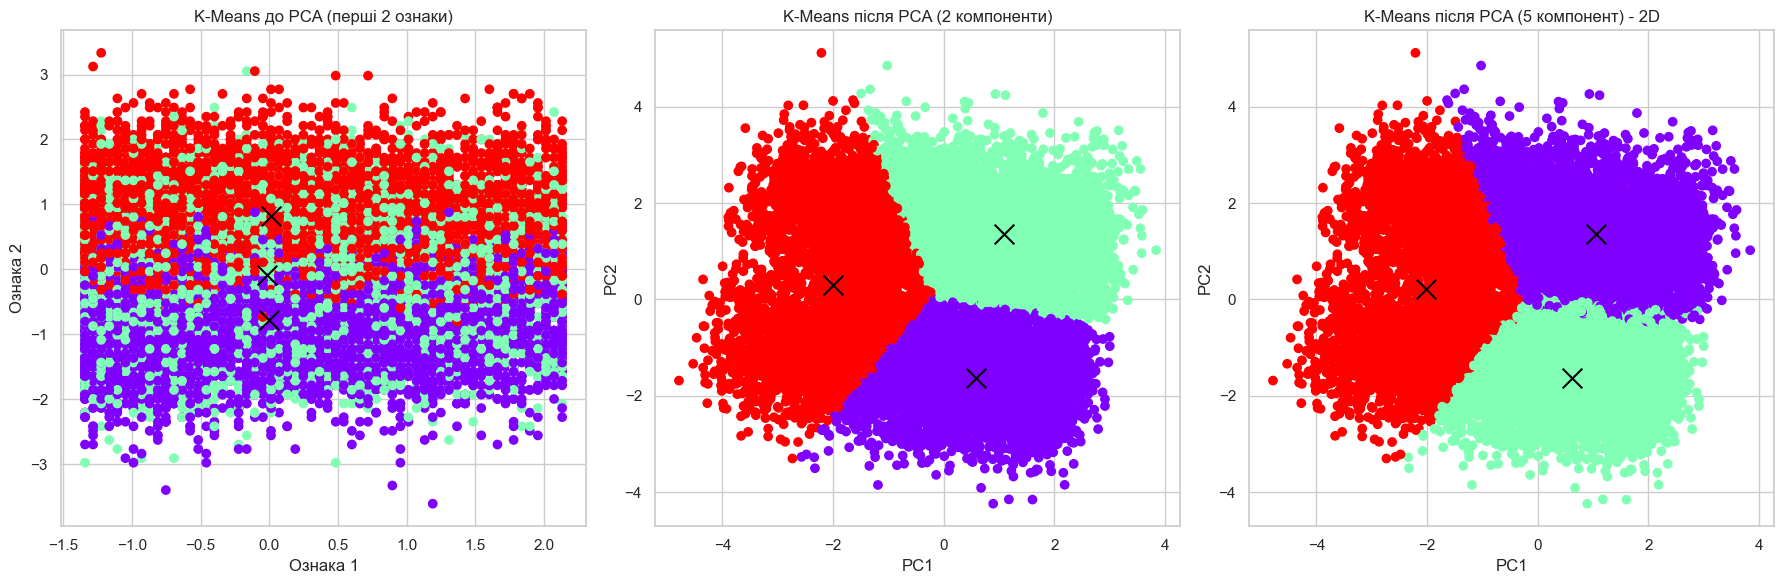

In [48]:
# Візуалізація KMEANS
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(18, 6))

# Ліва частина - До PCA
ax1 = fig.add_subplot(1, 3, 1)
ax1.scatter(ds_scaled.iloc[:, 0], ds_scaled.iloc[:, 1], c=labels_original, cmap='rainbow')
ax1.scatter(centroids_original[:, 0], centroids_original[:, 1], marker='x', s=200, c='black')
ax1.set_title('K-Means до PCA (перші 2 ознаки)')
ax1.set_xlabel('Ознака 1')
ax1.set_ylabel('Ознака 2')
ax1.grid(True)

# Середина - Після PCA (2 компоненти)
ax2 = fig.add_subplot(1, 3, 2)
ax2.scatter(ds_pca[:, 0], ds_pca[:, 1], c=labels_pca, cmap='rainbow')
ax2.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='x', s=200, c='black')
ax2.set_title('K-Means після PCA (2 компоненти)')
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.grid(True)

# Права частина - Після PCA (4 компонент) — 2D
ax3 = fig.add_subplot(1, 3, 3)
ax3.scatter(ds_pca_t2[:, 0], ds_pca_t2[:, 1], c=labels_pca_t2, cmap='rainbow')
ax3.scatter(centroids_pca_t2[:, 0], centroids_pca_t2[:, 1], marker='x', s=200, c='black')
ax3.set_title('K-Means після PCA (5 компонент) - 2D')
ax3.set_xlabel('PC1')
ax3.set_ylabel('PC2')
ax3.grid(True)

plt.tight_layout()
plt.show()

In [49]:
# # Візуалізація результатів кластеризації (якщо даних більше 1D)
# if ds_pca.shape[1] >= 2:
#     # Обмежуємо кількість елементів для візуалізації до 500
#     max_points = 15000
#     if ds_pca.shape[0] > max_points:
#         # Створюємо випадкову вибірку індексів для візуалізації
#         viz_indices = np.random.choice(ds_pca.shape[0], max_points, replace=False)
#         X_viz = ds_pca[viz_indices]
#         labels_viz = cluster_labels[viz_indices]
#         membership_viz = fuzzy_membership_matrix[viz_indices]
#     else:
#         X_viz = ds_pca
#         labels_viz = cluster_labels
#         membership_viz = fuzzy_membership_matrix
    
#     plt.figure(figsize=(15, 6))
    
#     # Візуалізація "жорсткого" розбиття (для перших двох вимірів)
#     plt.subplot(1, 2, 1)
#     colors = ['red', 'blue', 'green', 'purple', 'orange', 'cyan']
#     for i in range(n_clusters):
#         plt.scatter(X_viz[labels_viz == i, 0], X_viz[labels_viz == i, 1], 
#                     s=50, c=colors[i % len(colors)], label=f'Кластер {i+1}', alpha=0.7)
#     plt.scatter(cntr[:, 0], cntr[:, 1], s=200, c='black', marker='*', label='Центри')
#     plt.title(f'"Жорстке" розбиття (Silhouette Score: {silhouette_avg_fuzzy_pca:.4f})\n(обмежено до {len(X_viz)} точок)')
#     plt.grid(True)
#     plt.legend()
    
#     # Візуалізація нечіткої приналежності для першого кластера
#     plt.subplot(1, 2, 2)
#     scatter = plt.scatter(X_viz[:, 0], X_viz[:, 1], c=membership_viz[:, 0], 
#                 s=50, cmap='viridis', vmin=0, vmax=1)
#     plt.colorbar(scatter, label=f'Приналежність до кластера 1')
#     plt.title(f'Нечітка приналежність до кластера 1\n(обмежено до {len(X_viz)} точок)')
#     plt.grid(True)
#     plt.show()
    
#     # Додаткові графіки для інших кластерів
#     for i in range(1, n_clusters):
#         plt.figure(figsize=(8, 6))
#         scatter = plt.scatter(X_viz[:, 0], X_viz[:, 1], c=membership_viz[:, i], 
#                     s=50, cmap='viridis', vmin=0, vmax=1)
#         plt.colorbar(scatter, label=f'Приналежність до кластера {i+1}')
#         plt.title(f'Нечітка приналежність до кластера {i+1}\n(обмежено до {len(X_viz)} точок)')
#         plt.grid(True)
#         plt.show()

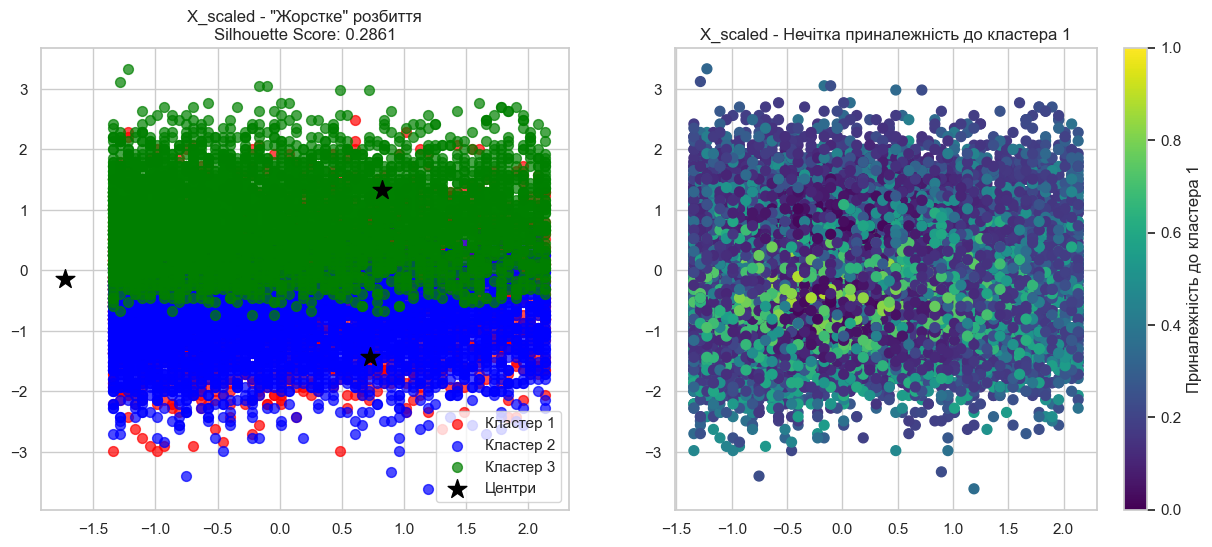

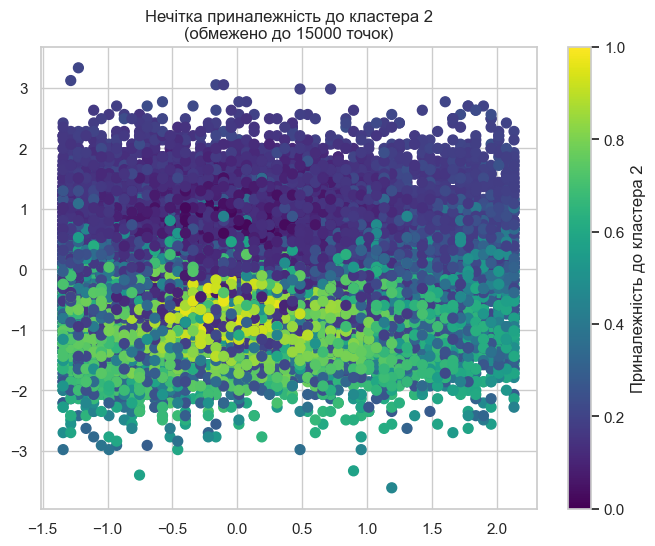

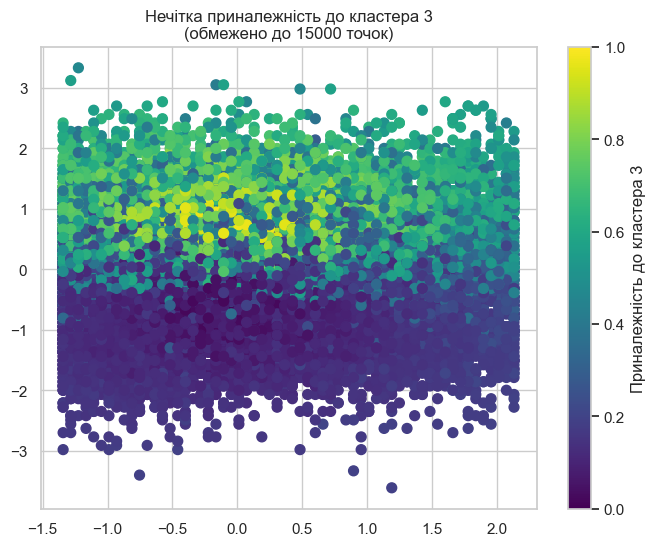

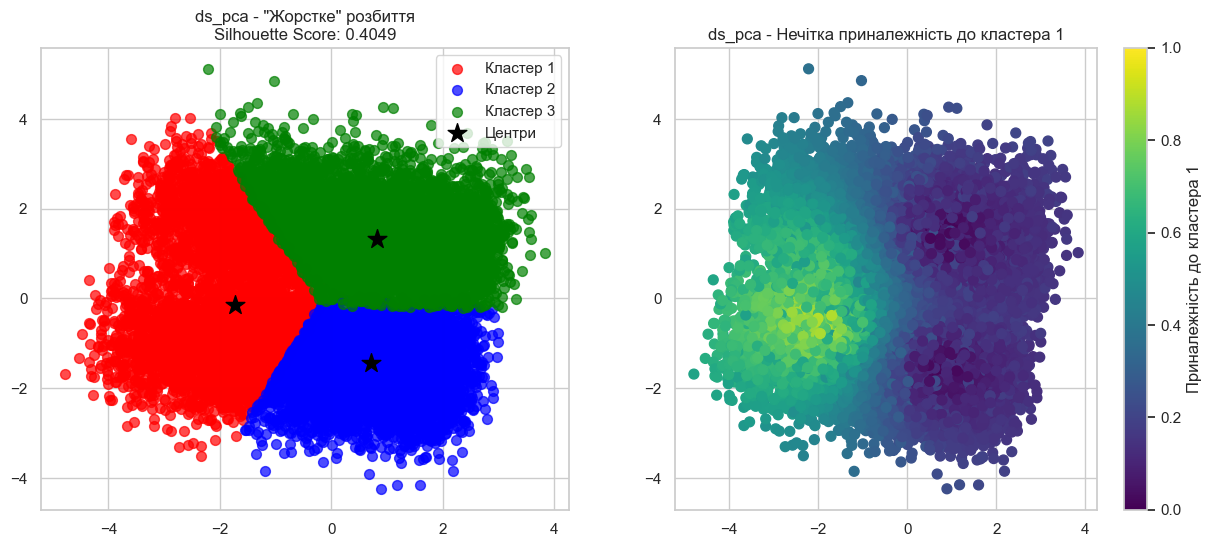

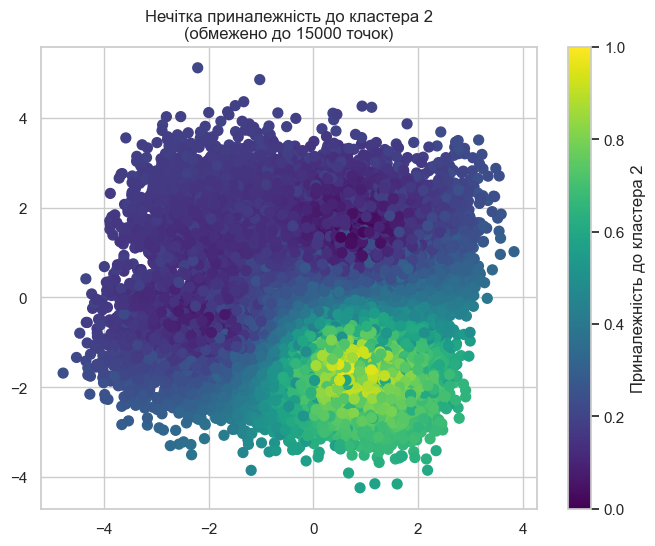

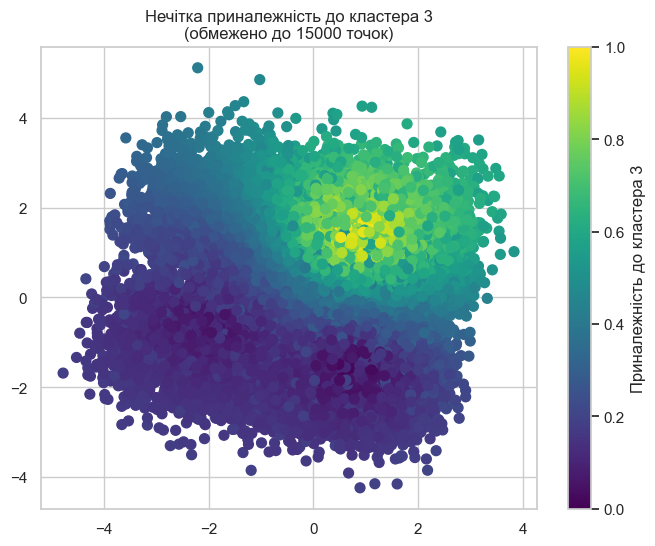

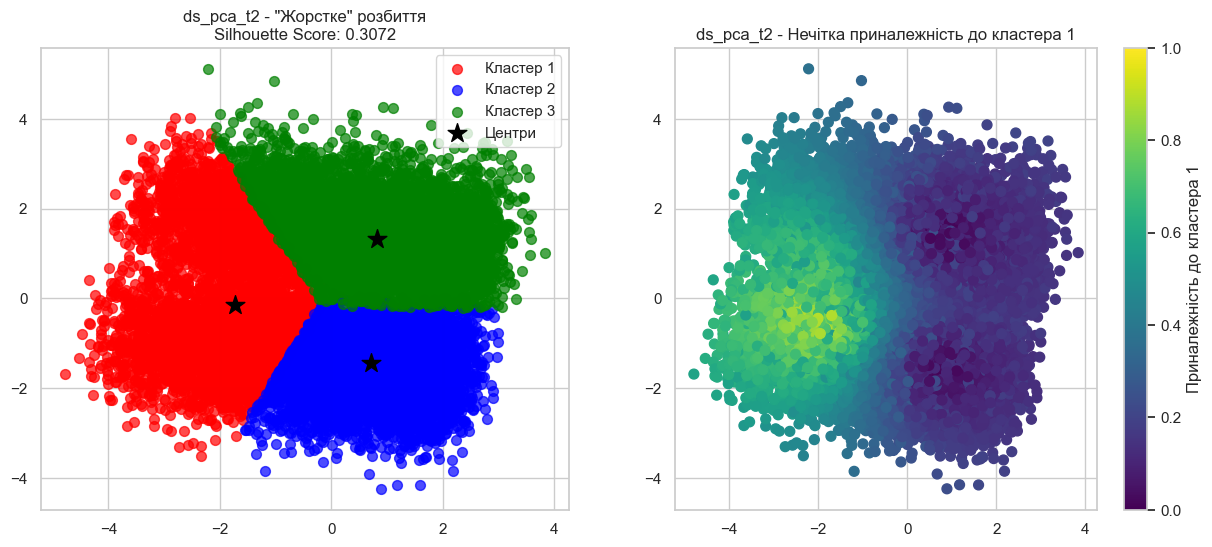

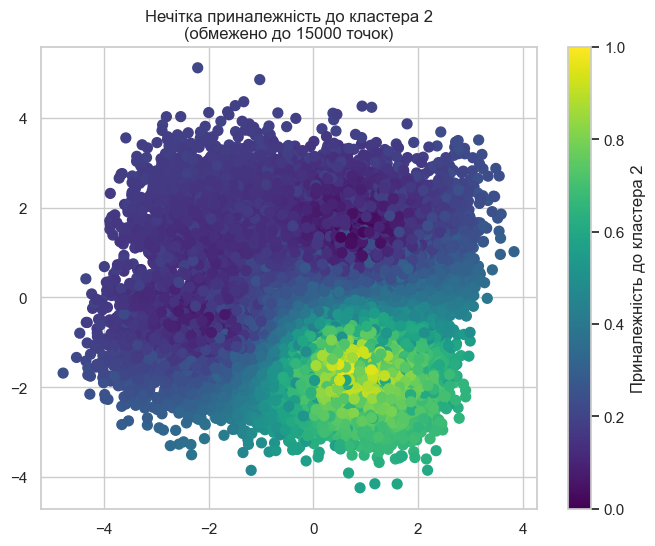

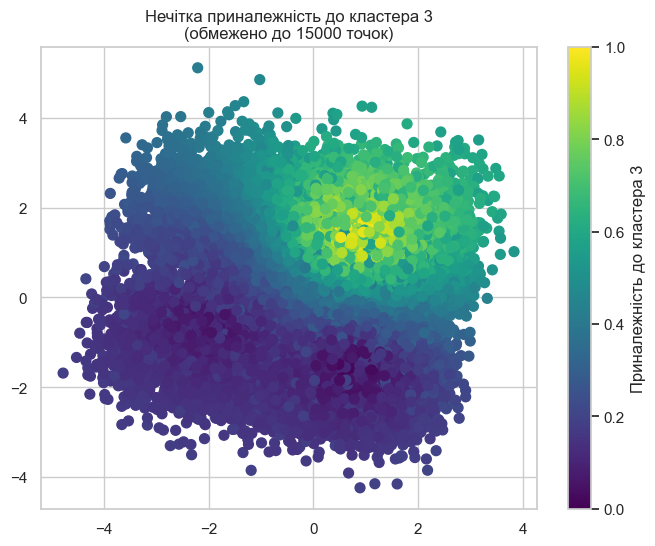

In [50]:
# Створюємо словник для зручності
datasets = {
    "X_scaled": (X_scaled, silhouette_avg_fuzzy),
    "ds_pca": (ds_pca, silhouette_avg_fuzzy_pca),
    "ds_pca_t2": (ds_pca_t2, silhouette_avg_fuzzy_pca_t2)
}

max_points = 15000

for name, (data, silhouette_score) in datasets.items():
    if data.shape[1] >= 2:
        if data.shape[0] > max_points:
            viz_indices = np.random.choice(data.shape[0], max_points, replace=False)
            data_viz = data[viz_indices]
            labels_viz = cluster_labels[viz_indices]
            membership_viz = fuzzy_membership_matrix[viz_indices]
        else:
            data_viz = data
            labels_viz = cluster_labels
            membership_viz = fuzzy_membership_matrix

        plt.figure(figsize=(15, 6))
        
        # Графік "жорсткої" кластеризації
        plt.subplot(1, 2, 1)
        colors = ['red', 'blue', 'green', 'purple', 'orange', 'cyan']
        for i in range(n_clusters):
            plt.scatter(data_viz[labels_viz == i, 0], data_viz[labels_viz == i, 1],
                        s=50, c=colors[i % len(colors)], label=f'Кластер {i+1}', alpha=0.7)
        plt.scatter(cntr[:, 0], cntr[:, 1], s=200, c='black', marker='*', label='Центри')
        plt.title(f'{name} - "Жорстке" розбиття\nSilhouette Score: {silhouette_score:.4f}')
        plt.grid(True)
        plt.legend()

        # Графік нечіткої приналежності до 1 кластеру
        plt.subplot(1, 2, 2)
        scatter = plt.scatter(data_viz[:, 0], data_viz[:, 1], c=membership_viz[:, 0],
                              s=50, cmap='viridis', vmin=0, vmax=1)
        plt.colorbar(scatter, label='Приналежність до кластера 1')
        plt.title(f'{name} - Нечітка приналежність до кластера 1')
        plt.grid(True)
        plt.show()

    # Додаткові графіки для інших кластерів
    for i in range(1, n_clusters):
        plt.figure(figsize=(8, 6))
        scatter = plt.scatter(data_viz[:, 0], data_viz[:, 1], c=membership_viz[:, i], 
                s=50, cmap='viridis', vmin=0, vmax=1)
        plt.colorbar(scatter, label=f'Приналежність до кластера {i+1}')
        plt.title(f'Нечітка приналежність до кластера {i+1}\n(обмежено до {len(data_viz)} точок)')
        plt.grid(True)
        plt.show()

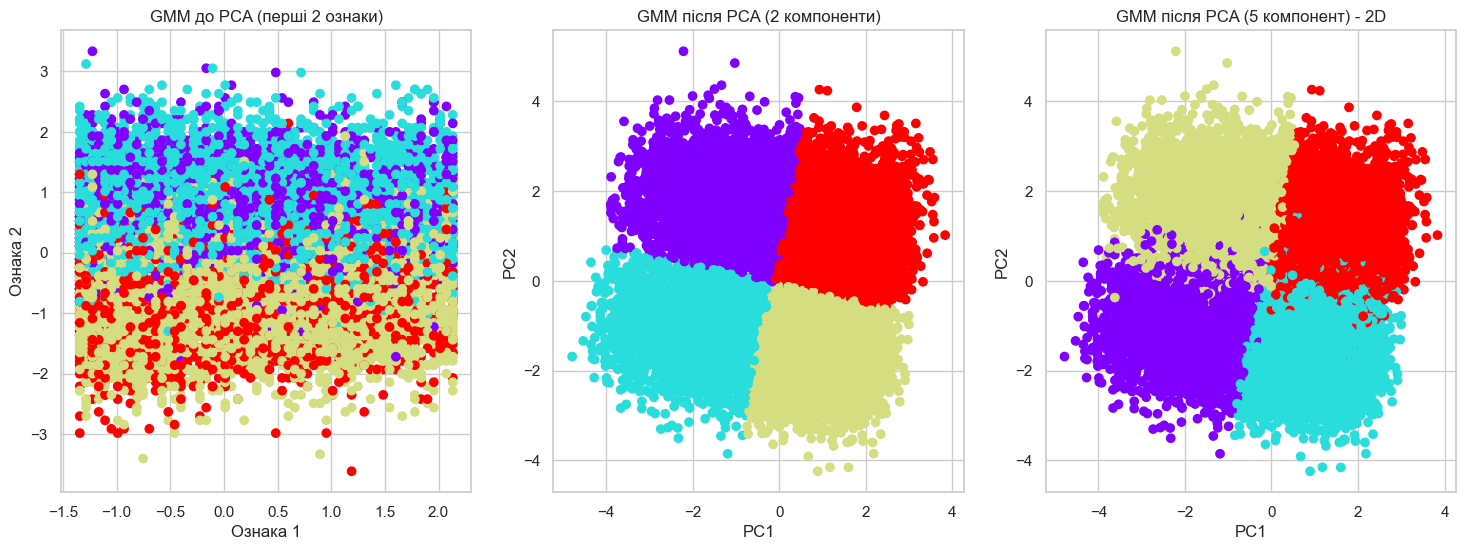

In [51]:
# Візуалізація GMM
fig = plt.figure(figsize=(18, 6))

# До PCA (2D)
ax1 = fig.add_subplot(1, 3, 1)
ax1.scatter(ds_scaled.iloc[:, 0], ds_scaled.iloc[:, 1], c=labels_gmm_original, cmap='rainbow')
ax1.set_title('GMM до PCA (перші 2 ознаки)')
ax1.set_xlabel('Ознака 1')
ax1.set_ylabel('Ознака 2')
ax1.grid(True)

# Після PCA (2 компоненти)
ax2 = fig.add_subplot(1, 3, 2)
ax2.scatter(ds_pca[:, 0], ds_pca[:, 1], c=labels_gmm_pca, cmap='rainbow')
ax2.set_title('GMM після PCA (2 компоненти)')
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.grid(True)

# Після PCA (5 компонент) — 2D
ax3 = fig.add_subplot(1, 3, 3)
ax3.scatter(ds_pca_t2[:, 0], ds_pca_t2[:, 1], c=labels_gmm_pca_t2, cmap='rainbow')
ax3.set_title('GMM після PCA (5 компонент) - 2D')
ax3.set_xlabel('PC1')
ax3.set_ylabel('PC2')
ax3.grid(True)

## <Center> **Аналіз та висновки** </Center>

#### <center> <p style = 'background-color:darkblue'><b>Порівняння показників</p> </center>

In [52]:
from IPython.display import display

# Таблиця для KMeans
kmeans_metrics = pd.DataFrame({
    "Метрика": ["Silhouette Score", "Davies-Bouldin Index", "Calinski-Harabasz Index"],
    "Без PCA": [sil_score_kmeans, db_score_kmeans, ch_score_kmeans],
    "PCA (2-3 компоненти)": [sil_score_kmeans_pca, db_score_kmeans_pca, ch_score_kmeans_pca],
    "PCA (4-5 компонентів)": [sil_score_kmeans_pca_t2, db_score_kmeans_pca_t2, ch_score_kmeans_pca_t2]
})

# Таблиця для Fuzzy C-Means
fuzzy_metrics = pd.DataFrame({
    "Метрика": ["Silhouette Score", "FPC", "Xie-Beni Index"],
    "Без PCA": [silhouette_avg_fuzzy, fpc_fuzzy, xb_index_fuzzy],
    "PCA (2-3 компоненти)": [silhouette_avg_fuzzy_pca, fpc_fuzzy_pca, xb_index_fuzzy_pca],
    "PCA (4-5 компонентів)": [silhouette_avg_fuzzy_pca_t2, fpc_fuzzy_pca_t2, xb_index_fuzzy_pca_t2]
})

# Таблиця для GMM
gmm_metrics = pd.DataFrame({
    "Метрика": ["Silhouette Score"],
    "Без PCA": [sil_score_gmm],
    "PCA (2-3 компоненти)": [sil_score_gmm_pca],
    "PCA (4-5 компонентів)": [sil_score_gmm_pca_t2]
})

#Таблиця для DBSCAN
dbscan_metrics = pd.DataFrame({
    "Метрика": ["Silhouette Score"],
    "Без PCA": [best_score_dbscan],
    "PCA (2-3 компоненти)": [best_score_dbscan_pca],
    "PCA (4-5 компонентів)": [best_score_dbscan_pca_t2]
})
print("Метрики KMeans")
display(kmeans_metrics)
print("Метрики Fuzzy C-Means")
display(fuzzy_metrics)
print("Метрики GMM")
display(gmm_metrics)
print("Метрики DBSCAN")
display(dbscan_metrics)

Метрики KMeans


,Метрика,Без PCA,PCA (2-3 компоненти),PCA (4-5 компонентів)
0,Silhouette Score,0.289665,0.407823,0.310772
1,Davies-Bouldin Index,1.163958,0.841367,1.103623
2,Calinski-Harabasz Index,6923.904932,12564.163205,7631.963776


Метрики Fuzzy C-Means


,Метрика,Без PCA,PCA (2-3 компоненти),PCA (4-5 компонентів)
0,Silhouette Score,0.286105,0.404933,0.307213
1,FPC,0.491816,0.633086,0.518758
2,Xie-Beni Index,0.303794,0.145663,0.258855


Метрики GMM


,Метрика,Без PCA,PCA (2-3 компоненти),PCA (4-5 компонентів)
0,Silhouette Score,0.272461,0.427728,0.312772


Метрики DBSCAN


,Метрика,Без PCA,PCA (2-3 компоненти),PCA (4-5 компонентів)
0,Silhouette Score,0.827616,0.974319,0.943505


---

#### <center> <p style = 'background-color:darkblue'><b>Обговорення впливу PCA</p> </center>

Застосування PCA зменшило розмірність даних і в більшості випадків покращило якість кластеризації, особливо при використанні 2–3 компонент. Найбільше це помітно для алгоритмів K-Means, GMM та Fuzzy C-Means, де зріс показник Silhouette Score, а інші метрики теж свідчать про чіткіше формування кластерів. Для DBSCAN PCA також дало значне покращення. Однак при використанні 4–5 компонент результати місцями погіршуються, що може бути пов’язано з додаванням менш інформативних ознак. Отже, оптимально використовувати 2–3 компоненти PCA для збереження балансу між якістю кластеризації та зменшенням розмірності.

#### <center> <p style = 'background-color:darkblue'><b>Переваги та недоліки алгоритмів</p> </center>

K-Means
✅ Простий у реалізації, швидкий для великих даних.
❌ Чутливий до вибору кількості кластерів та початкових центроїдів. Погано працює з некулястими кластерами.

Fuzzy C-Means
✅ Дозволяє об’єктам належати до кількох кластерів одночасно — підходить для нечітких даних.
❌ Також потребує задання кількості кластерів. Повільніший за K-Means, чутливий до початкових значень.

GMM (Gaussian Mixture Model)
✅ Гнучкіший за K-Means, може моделювати еліптичні кластери.
❌ Потребує кількості кластерів. Чутливий до початкових параметрів і легко переобучається.

DBSCAN
✅ Не потребує вказання кількості кластерів, виявляє шуми та кластери довільної форми.
❌ Дуже чутливий до параметрів eps і min_samples. Не працює добре при змінній густоті кластерів.

#### <center> <p style = 'background-color:darkblue'><b>Загальний висновок</p> </center>

Найкращі результати для даного набору даних показав алгоритм DBSCAN, особливо після зменшення розмірності за допомогою PCA. Його здатність виявляти шуми та формувати кластери довільної форми дозволила точніше відобразити структуру даних.
На результати кластеризації найбільше вплинули висока розмірність даних, наявність шумів та розподіл ознак. Застосування PCA покращило якість кластеризації завдяки видаленню надлишкової інформації та зниженню кореляції між ознаками.

## <Center> **For Copy** </Center>

#### <center> <p style = 'background-color:darkblue'><b>For Copy</p> </center>

<center><p><b>For Copy</p>

<mark><b>For Copy</mark>